In [6]:
SEED = 42

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle

In [3]:
df_train = pd.read_csv("dataTrain_13_EXP_av37.csv")
df_test = pd.read_csv("test.csv")
df_train.head()

,Unnamed: 0,id,gender,carType,carCategory,occupation,age,carGroup,bonus,carValue,...,claimValue,catAge,catClaims,catDensity,catClaimNumber,catExposure,catCarValue,ClaimValueExp,ClaimNumberExp,ClaimNumberExpArrondie
0,1,1,Female,A,Small,Unemployed,20,10,-10,24355,...,0.0,u25,u500,u175,zero,91-364,0-32000,0.0,0.0,0
1,2,2,Male,E,Small,Employed,35,12,20,6410,...,0.0,u50,u500,u75,zero,365,0-32000,0.0,0.0,0
2,3,3,Female,D,Medium,Employed,31,8,130,18545,...,0.0,u32,u500,u75,zero,365,0-32000,0.0,0.0,0
3,4,4,Male,D,Large,Employed,29,13,-50,18015,...,0.0,u32,u500,p175,zero,91-364,0-32000,0.0,0.0,0
4,5,5,Male,B,Medium,Self-employed,33,11,150,12325,...,0.0,u50,u500,u75,zero,91-364,0-32000,0.0,0.0,0


In [3]:
df_train.columns

Index(['Unnamed: 0', 'id', 'gender', 'carType', 'carCategory', 'occupation',
       'age', 'carGroup', 'bonus', 'carValue', 'material', 'subRegion',
       'region', 'cityDensity', 'exposure', 'claimNumber', 'claimValue',
       'catAge', 'catClaims', 'catDensity', 'catClaimNumber', 'catExposure',
       'catCarValue', 'ClaimValueExp', 'ClaimNumberExp',
       'ClaimNumberExpArrondie'],
      dtype='object')

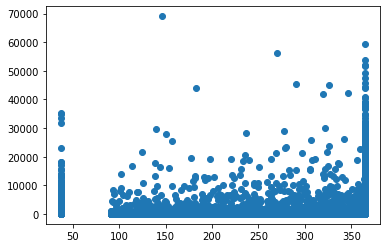

In [15]:
plt.scatter(df_train.exposure, df_train.claimValue)

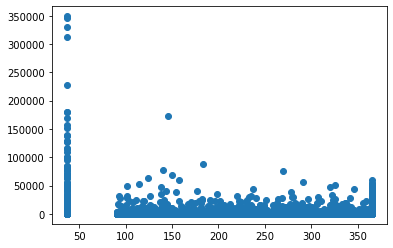

In [16]:
plt.scatter(df_train.exposure, df_train.ClaimValueExp)

Désolé Arthur mais on va pas utiliser cette normalisation 🤣

In [6]:
df_test.columns

Index(['id', 'gender', 'carType', 'carCategory', 'occupation', 'age',
       'carGroup', 'bonus', 'carValue', 'material', 'subRegion', 'region',
       'cityDensity'],
      dtype='object')

Seule la variable `exposure` n'existe pas.

On créer notre validation set en prenant soin au préalable d'enlever toute les variables que l'on souhaite prédire.

In [4]:
df_train = df_train[df_test.columns.tolist() + ['catClaimNumber', 'claimValue'] ]
df_train.columns

Index(['id', 'gender', 'carType', 'carCategory', 'occupation', 'age',
       'carGroup', 'bonus', 'carValue', 'material', 'subRegion', 'region',
       'cityDensity', 'catClaimNumber', 'claimValue'],
      dtype='object')

In [7]:
df_train = shuffle(df_train, random_state=SEED)

X_train = df_train[:50000].drop(columns=['id', 'claimValue', 'catClaimNumber'])
X_train_ids = df_train[:50000]['id']
y_train_claimNumber = df_train[:50000]['catClaimNumber']
y_train_claimValue = df_train[:50000]['claimValue']

X_val = df_train[50000:].drop(columns=['id', 'claimValue', 'catClaimNumber'])
X_val_ids = df_train[50000:]['id']
y_val_claimNumber = df_train[50000:]['catClaimNumber']
y_val_claimValue = df_train[50000:]['claimValue']


In [34]:
X_train.head()

,gender,carType,carCategory,occupation,age,carGroup,bonus,carValue,material,subRegion,region,cityDensity
12628,Female,B,Medium,Self-employed,22,3,-20,15830,1,M4,M,190.05160
37730,Male,C,Large,Unemployed,63,5,-30,12675,1,Q45,Q,98.10373
39991,Male,B,Medium,Unemployed,37,13,60,15980,0,O17,O,24.11879
8525,Male,B,Medium,Unemployed,41,13,-40,15345,1,U8,U,125.13200
8279,Female,E,Large,Unemployed,22,9,60,16385,1,L36,L,58.59040


In [28]:
y_train_claimNumber.head()

31309    zero
1236     zero
32047    zero
6082       p2
10927    zero
Name: catClaimNumber, dtype: object

In [35]:
X_train.shape, X_val.shape

((50000, 12), (10000, 12))

One hot encoding

In [8]:
X_train, X_val = pd.get_dummies(X_train), pd.get_dummies(X_val)

In [36]:

X_train.shape, X_val.shape

((50000, 503), (10000, 503))

In [65]:
y_train_claimNumber, y_val_claimNumber = pd.get_dummies(y_train_claimNumber), pd.get_dummies(y_val_claimNumber)
y_train_claimNumber.shape, y_val_claimNumber.shape

((50000, 3), (10000, 3))

## Naïve Random Forest Classifier PREMIER MODELE

In [9]:
naive_rfc_claimNumber = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=SEED)

In [10]:
# Fit rfc
naive_rfc_claimNumber.fit(X_train, y_train_claimNumber)
# predict
y_pred_claimNumber = naive_rfc_claimNumber.predict(X_val)

Text(0.5, 1.0, 'Claim Number Confusion Matrix')

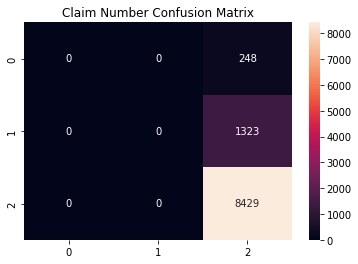

In [11]:
cm = confusion_matrix(y_val_claimNumber, y_pred_claimNumber)
sns.heatmap(cm, annot=True, fmt='d').set_title("Claim Number Confusion Matrix")

In [58]:
print(classification_report(y_val_claimNumber, y_pred_claimNumber))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          p2       0.00      0.00      0.00       248
          un       0.00      0.00      0.00      1323
        zero       0.84      1.00      0.91      8429

    accuracy                           0.84     10000
   macro avg       0.28      0.33      0.30     10000
weighted avg       0.71      0.84      0.77     10000



c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Terrible mdr, il prédit tout le monde sur zero sinistres...

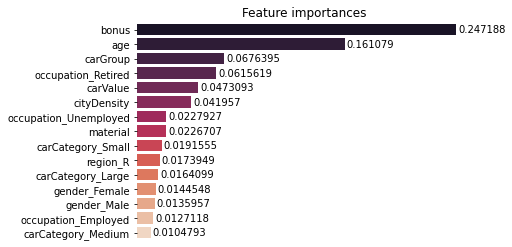

In [54]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': naive_rfc_claimNumber.feature_names_in_, 'importances': naive_rfc_claimNumber.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)[:15]

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [12]:
naive_rfc_claimNumber2 = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=SEED)
# Fit rfc
naive_rfc_claimNumber2.fit(X_train, y_train_claimNumber)
# predict
y_pred_claimNumber2 = naive_rfc_claimNumber2.predict(X_val)

Text(0.5, 1.0, 'Claim Number Confusion Matrix')

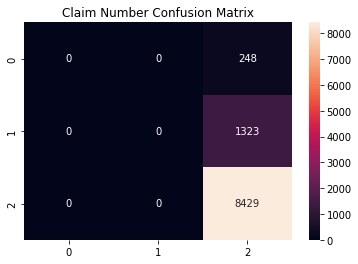

In [13]:
cm2 = confusion_matrix(y_val_claimNumber, y_pred_claimNumber2)
sns.heatmap(cm2, annot=True, fmt='d').set_title("Claim Number Confusion Matrix")

In [61]:
print(classification_report(y_val_claimNumber, y_pred_claimNumber2))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          p2       0.00      0.00      0.00       248
          un       0.00      0.00      0.00      1323
        zero       0.84      1.00      0.91      8429

    accuracy                           0.84     10000
   macro avg       0.28      0.33      0.30     10000
weighted avg       0.71      0.84      0.77     10000



c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Toujours pas mdr, peut être à cause de la class imbalance.  
Quid des probas prédites?

In [14]:
y_pred_proba_claimNumber2 = naive_rfc_claimNumber2.predict_proba(X_val)
y_pred_proba_claimNumber2[:10]

array([[0.04078301, 0.17251499, 0.786702  ],
       [0.01299048, 0.10006546, 0.88694406],
       [0.02027226, 0.12108301, 0.85864474],
       [0.03886529, 0.16544853, 0.79568618],
       [0.02718734, 0.13745499, 0.83535766],
       [0.01518726, 0.09690182, 0.88791093],
       [0.01815094, 0.11774318, 0.86410588],
       [0.01881807, 0.11428864, 0.8668933 ],
       [0.02677936, 0.14189   , 0.83133064],
       [0.01262002, 0.08654045, 0.90083952]])

In [17]:
y_pred_proba_claimNumber2.max(axis=0)

array([0.12521333, 0.22894681, 0.92743552])

In [18]:
y_pred_proba_claimNumber2.min(axis=0)

array([0.0068828 , 0.06568168, 0.66681708])

In [19]:
np.save("models/rfc_1000_8_proba_val.npy", y_pred_proba_claimNumber2)

One hot encoding

We can leverage a different metric to analyze our predictions: the ROC curve (area under the curve)

In [67]:
y_val_claimNumber.columns

Index(['p2', 'un', 'zero'], dtype='object')

In [69]:
y_val_claimNumber[:5]

,p2,un,zero
3675,0,0,1
15450,0,0,1
20608,0,0,1
46531,0,1,0
6749,0,0,1


In [70]:
from sklearn.metrics import roc_auc_score

prob_CN2_p2 = [p[0] for p in y_pred_proba_claimNumber2]
prob_CN2_one = [p[1] for p in y_pred_proba_claimNumber2]
prob_CN2_zero = [p[2] for p in y_pred_proba_claimNumber2]
# Ground Truth in a dataframe
y_GT_p2 = np.array(y_val_claimNumber.p2)
y_GT_one = np.array(y_val_claimNumber.un)
y_GT_zero = np.array(y_val_claimNumber.zero)

print(f"ROC score for claimNumber = p2: {roc_auc_score(y_GT_p2, prob_CN2_p2)}")
print(f"ROC score for claimNumber = one: {roc_auc_score(y_GT_one, prob_CN2_one)}")
print(f"ROC score for claimNumber = zero: {roc_auc_score(y_GT_zero, prob_CN2_zero)}")

ROC score for claimNumber = p2: 0.8385922490671891
ROC score for claimNumber = one: 0.6850920204943156
ROC score for claimNumber = zero: 0.7234420526449297


Pretty decent!

## Penalized SVM Classifier

In [73]:
y_train_claimNumber.shape

(50000, 3)

pour train un svm, il nous faut un des dimensions (50000, 1) pour y (un vecteur de "zero", "un", "p2").  
On récupère ça grâce aux ids

In [82]:
y_train_claimNumber_1d = np.array(df_train[df_train.id.isin(X_train_ids.values)].catClaimNumber)
y_val_claimNumber_1d = np.array(df_train[df_train.id.isin(X_val_ids.values)].catClaimNumber)

!! takes a lot of time to run

In [83]:
from sklearn.svm import SVC

# on va utiliser arbitrairement les poids suivants : 
weights = {"zero": 1, "un": 10, "p2": 100}

svc_claimNumber = SVC(gamma="scale", probability=True, class_weight=weights)
# svc_claimNumber.fit(X_train, y_train_claimNumber_1d)

SVC(class_weight={'p2': 100, 'un': 10, 'zero': 1}, probability=True)

In [84]:
y_pred_proba_claimNumber_svc = svc_claimNumber.predict_proba(X_val)
y_pred_claimNumber_svc = svc_claimNumber.predict(X_val)

In [85]:
y_pred_proba_claimNumber_svc[:5]

array([[0.0345584 , 0.2000015 , 0.7654401 ],
       [0.0060379 , 0.05237358, 0.94158853],
       [0.00814796, 0.05980445, 0.93204759],
       [0.0500708 , 0.21582452, 0.73410468],
       [0.02988968, 0.14708236, 0.82302796]])

In [86]:
y_pred_claimNumber_svc[:5]

array(['p2', 'p2', 'p2', 'p2', 'p2'], dtype=object)

Text(0.5, 1.0, 'Claim Number Confusion Matrix svc')

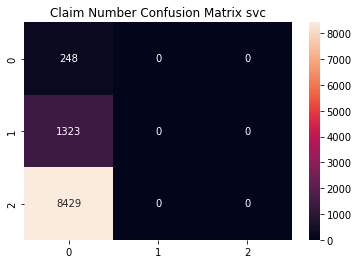

In [88]:
cm_svm = confusion_matrix(y_val_claimNumber_1d, y_pred_claimNumber_svc)
sns.heatmap(cm_svm, annot=True, fmt='d').set_title("Claim Number Confusion Matrix svc")

In [89]:
print(classification_report(y_val_claimNumber_1d, y_pred_claimNumber_svc))

              precision    recall  f1-score   support

          p2       0.02      1.00      0.05       248
          un       0.00      0.00      0.00      1323
        zero       0.00      0.00      0.00      8429

    accuracy                           0.02     10000
   macro avg       0.01      0.33      0.02     10000
weighted avg       0.00      0.02      0.00     10000



c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Bon bah j'ai peut être trop pénalisé mais il prédit unqiuement p2...

In [90]:
prob_svc_p2 = [p[0] for p in y_pred_proba_claimNumber_svc]
prob_svc_one = [p[1] for p in y_pred_proba_claimNumber_svc]
prob_svc_zero = [p[2] for p in y_pred_proba_claimNumber_svc]

print(f"ROC score for claimNumber = p2: {roc_auc_score(y_GT_p2, prob_svc_p2)}")
print(f"ROC score for claimNumber = one: {roc_auc_score(y_GT_one, prob_svc_one)}")
print(f"ROC score for claimNumber = zero: {roc_auc_score(y_GT_zero, prob_svc_zero)}")

ROC score for claimNumber = p2: 0.8070813431157216
ROC score for claimNumber = one: 0.6636415799721089
ROC score for claimNumber = zero: 0.6999203063534634


Le modèle est moins performant que le random forest...

## XGBoost

In [ ]:
# create xgboost model for claimNumber and fit it to the training data

from xgboost import XGBClassifier

xgb_claimNumber = XGBClassifier(random_state=SEED)
param_grid = 
grid_search = GridSearchCV(xgb_claimNumber, param_grid, cv=3, verbose=1)
xgb_claimNumber.fit(X_train, y_train_claimNumber_1d)

